# Mini Project - Machine Learning in Heathcare
By - Tushar Agrawal (1900910130119) (IT-2 Semester 3)

Mentor: Mr. Ajay Indoria

# **Objective**

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients.

Develop a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).

**Dataset & Data Description**

The dataset contains the patient records collected from a hospital in Greenland. The “Survived_1_year” column is a target variable which has binary entries (0 or 1).



*   Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
*   Survived_1_year == 1, implies that the patient survived after 1 year of treatment

**Data Description:**


* ID_Patient_Care_Situation: Care situation of a patient during treatment

* Diagnosed_Condition: The diagnosed condition of the patient

* ID_Patient: Patient identifier number

* Treatment_with_drugs: Class of drugs used during treatment

* Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)

* Patient_Age: Age of the patient

* Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.

* Patient_Smoker: If the patient was a smoker or not

* Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country

* Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and 
* Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn’t have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )



**Solution Steps**
1. Load data
2. Understand your data: EDA
3. Pre-process the data
4. Prepare train and test datasets
5. Choose a model
6. Train your model
7. Evaluate the model (F1-score calculation)
8. Optimize: repeat steps 5 - 7



**Load Libraries**


In [ ]:
import numpy as np # package for numerical computations
import pandas as pd # package for data analysis

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [ ]:
#Load Data
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

**Exploratory Data Analysis**

In [ ]:
# Take a look at few observations
pharma_data

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [ ]:
# A concise summary of the data
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

**Observations:**

1.   There are 23097 observations divided into 17 columns.
2.   There are some missing values in the dataset.



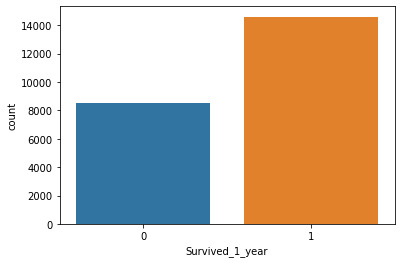

In [ ]:
sns.countplot(x='Survived_1_year', data=pharma_data)
plt.show()

There are 8000 + patients who did not survive after 1 year of treatment and 14000 + patients who survived after 1 year of treatment. The ratio is 1:2 (approx). So there is no class imbalance

In [ ]:
# Checking the null values in numerical columns
pharma_data.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [ ]:
pharma_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [ ]:
pharma_data.Treated_with_drugs.fillna('DX6',inplace=True) # filling the missing value of 'Treated_with_drugs' with its mode

In [ ]:
pharma_data.Number_of_prev_cond.value_counts()

1.0    9386
2.0    9016
3.0    3026
4.0     397
5.0      37
Name: Number_of_prev_cond, dtype: int64

In [ ]:
pharma_data.Number_of_prev_cond.fillna(1.0,inplace=True) # filling the missing value of 'Number_of_prev_cond' with its mode

In [ ]:
pharma_data.A.value_counts()

1.0    19630
0.0     2232
Name: A, dtype: int64

In [ ]:
pharma_data.B.value_counts()

0.0    18881
1.0     2981
Name: B, dtype: int64

In [ ]:
pharma_data.C.value_counts()

0.0    17816
1.0     4046
Name: C, dtype: int64

In [ ]:
pharma_data.D.value_counts()

0.0    20034
1.0     1828
Name: D, dtype: int64

In [ ]:
pharma_data.E.value_counts()

0.0    13265
1.0     8597
Name: E, dtype: int64

In [ ]:
pharma_data.F.value_counts()

0.0    20688
1.0     1174
Name: F, dtype: int64

In [ ]:
pharma_data.Z.value_counts()

0.0    21849
1.0       13
Name: Z, dtype: int64

In [ ]:
 # filling the missing value of 'A','B','C','D','E','F','Z' with its mode
pharma_data.A.fillna(1.0,inplace=True)
pharma_data.B.fillna(0.0,inplace=True)
pharma_data.C.fillna(0.0,inplace=True)
pharma_data.D.fillna(0.0,inplace=True)
pharma_data.E.fillna(0.0,inplace=True)
pharma_data.F.fillna(0.0,inplace=True)
pharma_data.Z.fillna(0.0,inplace=True)

In [ ]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23097 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          23097 non-null  float64
 10  B                          23097 non-null  float64
 11  C                          23097 non-null  float64
 12  D                          23097 non-null  float64
 13  E                          23097 non-null  flo

Clearly there are no null values left now

In [ ]:
pharma_data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

**Data Preprocessing and Cleaning**

In [ ]:
# We can split the column 'Treated_with_drugs' in 'DX1-6' corrosponding to value of each patient to clean the data
pharma_data['DX1']=0
pharma_data['DX2']=0
pharma_data['DX3']=0
pharma_data['DX4']=0
pharma_data['DX5']=0
pharma_data['DX6']=0
pharma_data.loc[pharma_data.Treated_with_drugs.str.contains("DX1"),'DX1']=1
pharma_data.loc[pharma_data.Treated_with_drugs.str.contains("DX2"),'DX2']=1
pharma_data.loc[pharma_data.Treated_with_drugs.str.contains("DX4"),'DX4']=1
pharma_data.loc[pharma_data.Treated_with_drugs.str.contains("DX3"),'DX3']=1
pharma_data.loc[pharma_data.Treated_with_drugs.str.contains("DX5"),'DX5']=1
pharma_data.loc[pharma_data.Treated_with_drugs.str.contains("DX6"),'DX6']=1

In [ ]:
# Convert textual data in numerical data
pharma_data.Patient_Rural_Urban=pharma_data.Patient_Rural_Urban.apply(lambda x: 1 if x=='URBAN' else 0) 
pharma_data.loc[pharma_data.Patient_Smoker=='YES','Patient_Smoker']=1
pharma_data.loc[pharma_data.Patient_Smoker=='NO','Patient_Smoker']=2
pharma_data.loc[pharma_data.Patient_Smoker=='Cannot say','Patient_Smoker']=2
pharma_data #data after all the processing

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6
0,22374,8,3333,DX6,56,18.479385,1,1,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,1
1,18164,5,5740,DX2,36,22.945566,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,0,0,0,0
2,6283,23,10446,DX6,48,27.510027,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
3,5339,51,12011,DX1,5,19.130976,2,1,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0,0,0,0
4,33012,0,12513,DX6,128,1.348400,2,0,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,2,0,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0,0,1,0,1,0,0
23093,15503,41,2769,DX6,55,23.684585,2,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,1
23094,2167,24,7671,DX6,63,27.500039,1,0,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,1
23095,31646,11,5764,DX3,25,23.719125,1,0,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,0,1,0,0,0


In [ ]:
# For feeding and testing our model, we can use 'pharma_data' and split it in 'X' and 'Y' as our features and result
X=pharma_data[[ 'Diagnosed_Condition','Patient_Age', 'Patient_Body_Mass_Index','Patient_Smoker', 'Patient_Rural_Urban','A', 'B', 'C', 'D', 'E', 'F', 'Number_of_prev_cond', 'DX1', 'DX2', 'DX3', 'DX4', 'DX5', 'DX6']]
Y=pharma_data['Survived_1_year']

In [ ]:
# Preprocess our features in 'X' for better calculations
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.225048,1.165773,-1.306719,-1.160919,1.522204,0.327068,-0.384955,-0.460844,-0.293167,1.298705,-0.231411,0.377048,-0.469245,-0.472059,-0.468284,-0.465739,-0.469863,1.296062
1,-1.424641,0.142727,-0.133747,-1.160919,-0.656942,0.327068,-0.384955,-0.460844,-0.293167,-0.769998,-0.231411,-0.924697,-0.469245,2.118378,-0.468284,-0.465739,-0.469863,-0.771568
2,-0.227079,0.756555,1.065036,-1.160919,-0.656942,0.327068,-0.384955,-0.460844,-0.293167,-0.769998,-0.231411,-0.924697,-0.469245,-0.472059,-0.468284,-0.465739,-0.469863,1.296062
3,1.635794,-1.442995,-1.135589,0.861386,1.522204,0.327068,-0.384955,-0.460844,-0.293167,-0.769998,-0.231411,-0.924697,2.131081,-0.472059,-0.468284,-0.465739,-0.469863,-0.771568
4,-1.757297,4.848739,-5.805900,0.861386,-0.656942,-3.057469,-0.384955,-0.460844,-0.293167,-0.769998,-0.231411,-0.924697,-0.469245,-0.472059,-0.468284,-0.465739,-0.469863,1.296062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,-1.557704,-0.982624,-1.263630,0.861386,-0.656942,0.327068,2.597705,-0.460844,3.411029,1.298705,4.321315,4.282282,-0.469245,2.118378,-0.468284,2.147127,-0.469863,-0.771568
23093,0.970482,1.114621,0.060344,0.861386,-0.656942,0.327068,-0.384955,-0.460844,-0.293167,-0.769998,-0.231411,-0.924697,-0.469245,-0.472059,-0.468284,-0.465739,-0.469863,1.296062
23094,-0.160548,1.523839,1.062413,-1.160919,-0.656942,0.327068,-0.384955,-0.460844,-0.293167,-0.769998,-0.231411,-0.924697,-0.469245,-0.472059,-0.468284,-0.465739,-0.469863,1.296062
23095,-1.025454,-0.419949,0.069416,-1.160919,-0.656942,0.327068,-0.384955,-0.460844,-0.293167,1.298705,-0.231411,0.377048,-0.469245,-0.472059,2.135458,-0.465739,-0.469863,-0.771568


**Training and Testing Data**

We will initially train our model on 75% of first 20000 values and test on next 25% of first 20000 values. 

Later on, we will validate our model.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X[:20000], Y[:20000], test_size=0.25) #Get values for test and train sets

We will test three classifiers - Logistic Regression, Random Forest and Gradient Booster Classifier and use the one which gives us the best results.

In [ ]:
from sklearn.linear_model import LogisticRegression     # Logistic regression model

model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help prevent from convergence warning.
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(f1_score(y_test,pred))

0.7947959787108221


In [ ]:
from sklearn.ensemble import RandomForestClassifier #Random Forest Model

forest = RandomForestClassifier()
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
f1_score(y_test ,y_pred)

0.8499531103469835

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier #Gradient boosting classifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
f1_score(pred,y_test)

0.8626847290640394

According to results, we get the **maximum score for Gradient boosting**. So we will try to further enhance the results.

We will now train and test using Gradient Boosting Classifier on our data for different values of parameters and find the optimum parameters.

**Hyperparameter Tuning**

In [ ]:
# We will now train and test our model for different values of learning_rates as parameter
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
best_lr=[]
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f1_score(pred,y_test))
    if (f1_score(pred,y_test))>0.86:
        best_lr.append(eta)

0.8644757433489828
0.868408699734001
0.8682774746687452
0.8626847290640394
0.854954954954955
0.8217779668226286


In [ ]:
# We will now train and test our model for different values of n_estimators as parameter
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200, 300,400,500,1000]
best_est=[]
for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f1_score(pred,y_test))
    if f1_score(pred,y_test)>0.86:
        best_est.append(estimator)

0.7733071638861629
0.7733071638861629
0.7896521411528319
0.8185200496072756
0.8338630453626118
0.8492425356670098
0.8588770864946889
0.8626847290640394
0.8653517626960708
0.8687655860349126
0.8697144640349508
0.8685732145647758
0.8678178963893249


In [ ]:
# We will now train and test our model for different values of max_depths as parameter
max_depths = np.linspace(1, 32, 32, endpoint=True)
best_md=[]
for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth) 
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f1_score(pred,y_test))
    if f1_score(pred,y_test)>0.86:
        best_md.append(max_depth)

0.8353587962962963
0.8552064078866297
0.8626847290640394
0.8662538699690402
0.8655645664379289
0.8661762404132102
0.8645080163470606
0.8642868375530744
0.8615770496943095
0.8539078471457776
0.8531402487014008
0.848646110502426
0.8425184487360653
0.8416915579311429
0.8357927786499215
0.8350612629594723
0.8359240069084629
0.829268292682927
0.8277277751460603
0.8215925280987811
0.81790664330094
0.8181673812926791
0.8136349155782097
0.815262321144674
0.8162549800796813
0.8132951653944019
0.8172111553784861
0.8143312101910828
0.8131272901067389
0.813435211716014
0.8141536499840611
0.8144609014174232


In [ ]:
# We will now train and test our model for different values of min_samples_splits as parameter
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
best_mss=[]
for min_samples_split in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=min_samples_split)  
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f1_score(pred,y_test))
    if f1_score(pred,y_test)>0.86:
        best_mss.append(min_samples_splits)

0.8625825272531858
0.8619259714329596
0.8616710263117402
0.8560478307527212
0.8530718553700015
0.8495278708498325
0.8442285041224971
0.8409727339719971
0.8362953330443577
0.8353587962962963


In [ ]:
# We will now train and test our model for different values of min_samples_leafs as parameter
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
best_msl=[]
for min_samples_leaf in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=min_samples_leaf)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f1_score(pred,y_test))
    if f1_score(pred,y_test)>0.86:
        best_msl.append(min_samples_leaf)

0.8499539736115371
0.8287756370416407
0.8110319745415971
0.7854367534897106
0.7733071638861629


In [ ]:
# We will now train and test our model for different values of max_features as parameter
max_features = list(range(1,X.shape[1]))
best_mf=[]
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print(f1_score(pred,y_test))
    if f1_score(pred,y_test)>0.86:
        best_mf.append(max_feature)

0.8491886258746464
0.8523601266777259
0.856838905775076
0.8605614358030373
0.8610555470072319
0.8594636015325671
0.8586307244601011
0.8625883799569628
0.8620320855614972
0.8603831417624522
0.8588938256473111
0.861396776669225
0.8598130841121496
0.8616939807014856
0.8615762789983101
0.8651806302843966
0.8621853898096993


We will now validate our model for parameters on which we get maximum score. For this, we will train on first 20000 values of pharma_data/X and validate it on last 3097 values.

In [ ]:
validate_x,validate_y=X[20000:],Y[20000:] #create validation test

In [ ]:
# We will now validate our model for different values of learning_rate as parameter for which we got high scores during testing
for i in best_lr:
    model = GradientBoostingClassifier(learning_rate=i)
    model.fit(X[:20000],Y[:20000])
    pred=model.predict(validate_x)
    print(f1_score(validate_y,pred))

0.8747795414462082
0.8767330476430552
0.8791593695271454
0.8757076052178194


In [ ]:
# We will now validate our model for different values of n_estimators as parameter for which we got high scores during testing
for i in best_est:
    model = GradientBoostingClassifier(n_estimators=i)
    model.fit(X[:20000],Y[:20000])
    pred=model.predict(validate_x)
    print(f1_score(validate_y,pred))

0.8757076052178194
0.878644405681535
0.8803204807210816
0.8811259110329229
0.8829733802109492
0.8819252945600401


In [ ]:
# We will now validate our model for different values of learning_rate as parameter for which we got high scores during testing
for i in best_md:
    model = GradientBoostingClassifier(max_depth=i)
    model.fit(X[:20000],Y[:20000])
    pred=model.predict(validate_x)
    print(f1_score(validate_y,pred))

0.8757076052178194
0.8795448924066287
0.8821330675305258
0.8801404212637913
0.8775818639798488
0.8738353059682699
0.8711223203026481


In [ ]:
# We will now validate our model for different values of min_samples_split as parameter for which we got high scores during testing
for i in best_mss[0]:
    model = GradientBoostingClassifier(min_samples_split=i)
    model.fit(X[:20000],Y[:20000])
    pred=model.predict(validate_x)
    print(f1_score(validate_y,pred))

0.8754623921085081
0.8722879684418147
0.8754623921085081
0.8735236220472441
0.8678500986193293
0.8703658832081416
0.857551214864221
0.8549870313605282
0.8499534016775395
0.8484147188150891


In [ ]:
# We will now validate our model for different values of min_samples_leaf as parameter for which we got high scores during testing
for i in best_msl:
    model = GradientBoostingClassifier(min_samples_leaf=i)
    model.fit(X[:20000],Y[:20000])
    pred=model.predict(validate_x)
    print(f1_score(validate_y,pred))

In [ ]:
# We will now validate our model for different values of max_features as parameter for which we got high scores during testing
for i in best_mf:
    model = GradientBoostingClassifier(max_features=i)
    model.fit(X[:20000],Y[:20000])
    pred=model.predict(validate_x)
    print(f1_score(validate_y,pred))

0.8764155588380108
0.8721359940872135
0.8774352651048088
0.8746600741656366
0.8750617283950618
0.8734270910436713
0.8772794480039429
0.878495421925266
0.8765705838876571
0.8771583621114949


In [ ]:
# Store the best parameters for future reference
params=[best_lr,best_est,best_md,best_mss[0],best_msl,best_mf]
params[3]=list(params[3])
params=pd.DataFrame(params).round(1)
params.index=['learning_rate','n_estimators','max_depth','min_samples_split','min_samples_leaf','max_features']
params

,0,1,2,3,4,5,6,7,8,9
learning_rate,1.0,0.5,0.2,0.1,NaN,NaN,NaN,NaN,NaN,NaN
n_estimators,100.0,200.0,300.0,400.0,500.0,1000.0,NaN,NaN,NaN,NaN
max_depth,3.0,4.0,5.0,6.0,7.0,8.0,9.0,NaN,NaN,NaN
min_samples_split,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
min_samples_leaf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_features,4.0,5.0,8.0,9.0,10.0,12.0,14.0,15.0,16.0,17.0


In [ ]:
model = GradientBoostingClassifier(n_estimators=500)
model.fit(X[:20000],Y[:20000])
pred=model.predict(validate_x)
print(f1_score(validate_y,pred))

0.8829733802109492


After the obtained results it is clear that we got the maximum f1 score when we used **value of n_estimators to be 500**. So we will use it to predict our values.

We will process our new unseen data on which we will predict results similar to how we processed pharma_data


**Conclusion**
* It is clearly observable that how the f1 scores increased from logistic regression to random forest, then to gradient boosting classifier.
* Then again the f1 score increased with Hyper parameter tunning.
* Also this is one of the approach to solve this problem. There can be many other approaches to solve this problem.

**New Test Data**

Tasks to be performed:

* Load the new test data
* Preprocess and clean the data
* Predict the output
* Download the predicted values in csv

**Reading New Data to predict results**

In [ ]:
#Read new unseen data to predict results based on our model
new_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

**Data Pre-processing and Cleaning on new data**

In [ ]:
new_data.info() #A look into new data There are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

There are no null values so we can process textual data and feed in our model

In [ ]:
#Convert textual new data in numerical new data
new_data['DX1']=0
new_data['DX2']=0
new_data['DX3']=0
new_data['DX4']=0
new_data['DX5']=0
new_data['DX6']=0
new_data.loc[new_data.Treated_with_drugs.str.contains("DX1"),'DX1']=1
new_data.loc[new_data.Treated_with_drugs.str.contains("DX2"),'DX2']=1
new_data.loc[new_data.Treated_with_drugs.str.contains("DX4"),'DX4']=1
new_data.loc[new_data.Treated_with_drugs.str.contains("DX3"),'DX3']=1
new_data.loc[new_data.Treated_with_drugs.str.contains("DX5"),'DX5']=1
new_data.loc[new_data.Treated_with_drugs.str.contains("DX6"),'DX6']=1
new_data.Patient_Rural_Urban=new_data.Patient_Rural_Urban.apply(lambda x: 1 if x=='URBAN' else 0)
new_data.loc[new_data.Patient_Smoker=='YES','Patient_Smoker']=1
new_data.loc[new_data.Patient_Smoker=='NO','Patient_Smoker']=2
new_data.loc[new_data.Patient_Smoker=='Cannot say','Patient_Smoker']=2

In [ ]:
# ID and patient ID does not contribute in model/prediction.
# Patient's mental condition is stable in all cases
# Z is a very rare condition among patients and can cause imbalance in actual results
# We have already splitted 'Treated_with_drugs' and using it is redundant
# We can safely drop all these columns from our data
new_data.drop(columns=['ID_Patient_Care_Situation','Patient_ID','Patient_mental_condition','Z','Treated_with_drugs'],inplace=True)

In [ ]:
new_data

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6
0,40,16,29.443894,2,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,1,0,0,0
1,52,24,26.836321,2,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,1
2,50,63,25.523280,2,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,1,1,0
3,32,42,27.171155,2,1,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0,0,0,0,0,1
4,20,50,25.556192,2,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,28,29.106314,2,0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0,0,0,0,0,1
9299,7,4,20.616673,2,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1,0,0,0,0,0
9300,16,20,24.727357,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1,1,1,0
9301,50,33,17.517426,2,1,1.0,1.0,1.0,1.0,0.0,1.0,5.0,0,0,0,1,0,0


In [ ]:
# Preprocess our features in 'new_data' for better calculations
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_data)
new_data=pd.DataFrame(scaler.transform(new_data))

In [ ]:
new_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.882265,-0.885617,1.595757,0.862799,-0.656346,0.34568,-0.407352,-0.473540,-0.309242,1.226172,-0.236303,0.313338,-0.461419,-0.470816,2.161611,-0.470134,-0.468429,-0.769874
1,1.677123,-0.474874,0.903929,0.862799,1.523586,0.34568,2.454880,-0.473540,-0.309242,-0.815546,-0.236303,0.313338,-0.461419,-0.470816,-0.462618,-0.470134,-0.468429,1.298913
2,1.544646,1.527501,0.555559,0.862799,-0.656346,0.34568,-0.407352,-0.473540,-0.309242,1.226172,-0.236303,0.313338,-0.461419,-0.470816,-0.462618,2.127051,2.134795,-0.769874
3,0.352359,0.449299,0.992765,0.862799,1.523586,0.34568,-0.407352,2.111754,-0.309242,1.226172,-0.236303,1.610038,-0.461419,-0.470816,-0.462618,-0.470134,-0.468429,1.298913
4,-0.442499,0.860043,0.564291,0.862799,-0.656346,0.34568,-0.407352,-0.473540,-0.309242,-0.815546,-0.236303,-0.983362,-0.461419,-0.470816,2.161611,-0.470134,-0.468429,-0.769874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,-1.038643,-0.269502,1.506192,0.862799,-0.656346,0.34568,2.454880,2.111754,-0.309242,-0.815546,-0.236303,1.610038,-0.461419,-0.470816,-0.462618,-0.470134,-0.468429,1.298913
9299,-1.303596,-1.501733,-0.746238,0.862799,1.523586,0.34568,2.454880,-0.473540,-0.309242,-0.815546,-0.236303,0.313338,2.167228,-0.470816,-0.462618,-0.470134,-0.468429,-0.769874
9300,-0.707452,-0.680246,0.344388,-1.159019,1.523586,0.34568,-0.407352,-0.473540,-0.309242,-0.815546,-0.236303,-0.983362,2.167228,-0.470816,2.161611,2.127051,2.134795,-0.769874
9301,1.544646,-0.012787,-1.568515,0.862799,1.523586,0.34568,2.454880,2.111754,3.233713,-0.815546,4.231848,4.203438,-0.461419,-0.470816,-0.462618,2.127051,-0.468429,-0.769874


**Results Prediction on New Data**

In [ ]:
model = GradientBoostingClassifier(n_estimators=500)
model.fit(X,Y) #train our model on complete X/pharma_data for better results
res=model.predict(new_data)
pd.DataFrame(res).to_csv("result.csv")

In [ ]:
res

array([1, 1, 1, ..., 1, 0, 0])